In [22]:
import numpy as np
import matplotlib.pyplot as plt


def f(t, u):
    return 5 * (2 - u) * u


a = 0
b = 1  # closed interval
u_a = 0.04
n = 16  # division


def solve_oed_euler(a, b, f, n, u_a):
    dt = (b - a) / n
    t = [a + i * dt for i in range(n + 1)]
    u = np.zeros(n + 1)
    u[0] = u_a

    for i in range(n):
        u[i + 1] = u[i] + dt * f(t[i], u[i])
    return u


def solve_oed_runge_kutta(a, b, f, n, u_a):
    dt = (b - a) / n
    t = [a + i * dt for i in range(n + 1)]
    u = np.zeros(n + 1)
    u[0] = u_a
    for i in range(n):
        k_1 = f(t[i], u[i])
        k_2 = f(t[i] + dt / 2, u[i] + (1 / 2) * dt * k_1)
        k_3 = f(t[i] + dt / 2, u[i] + (1 / 2) * dt * k_2)
        k_4 = f(t[i + 1], u[i] + dt * k_3)
        u[i + 1] = u[i] + (1 / 6) * dt * (k_1 + 2 * (k_2 + k_3) + k_4)
    return u


u_euler = solve_oed_euler(a, b, f, n, u_a)
u_rung_kutta = solve_oed_runge_kutta(a, b, f, n, u_a)
u = [2 / (1 + 49 * np.e ** (-10 * i / n)) for i in range(n + 1)]
err_euler = max(np.abs(u - u_euler)) / max(np.abs(u))
err_rung_kutta = max(np.abs(u - u_rung_kutta)) / max(np.abs(u))

print("Euler法の相対誤差は      {}".format(err_euler))
print("Runge-kutta法の相対誤差は{}".format(err_rung_kutta))

Euler法の相対誤差は      0.18723286160661864
Runge-kutta法の相対誤差は0.00040142766031261984


<function matplotlib.pyplot.show(close=None, block=None)>

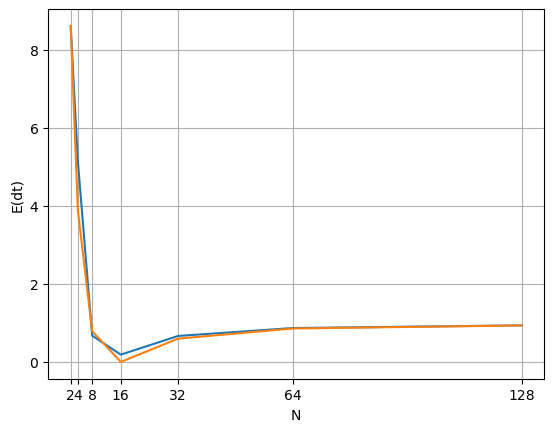

In [37]:
x = [2**i for i in range(1, 8)]


def u_n(j):
    return [2 / (1 + 49 * np.e ** (-10 * i / n)) for i in range(j + 1)]


def culc_err_euler(j):
    return max(np.abs(u_n(j) - solve_oed_euler(a, b, f, j, u_a))) / max(np.abs(u_n(j)))


def culc_err_range_kuuta(j):
    return max(np.abs(u_n(j) - solve_oed_runge_kutta(a, b, f, j, u_a))) / max(
        np.abs(u_n(j))
    )


y_1 = [culc_err_euler(i) for i in x]
y_2 = [culc_err_range_kuuta(i) for i in x]

plt.plot(x, y_1)
plt.plot(x, y_2)
plt.xticks(x)
plt.grid()
plt.xlabel("N")
plt.ylabel("E(dt)")
# plt.plot(x,y_2)
plt.savefig("1SC22317Y02d01.pdf")
plt.show